<a href="https://colab.research.google.com/github/emily-pan/LearnAI/blob/main/Week_2_Numpy_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Week 2 Numpy Class
Proprietary material - Under Creative Commons 4.0 licence CC-BY-NC-ND https://creativecommons.org/licenses/by-nc-nd/4.0/

Previous content needed for this material:

- Functions

- Methods 

- Helpful: Basics of Linear Algebra

## Preamble: Basic Libraries

Before jumping into Numpy, lets quickly see how to install and import Python libraries alongside with some basic and helpful libraries!

If a library contains several modules, those can also be individualy imported using `from`. 

Lets see a commonly used example:

In [ ]:
from os import path
path.isfile("fakefile")

Libraries can also be imported using an alias by using `as` - this just changes (often shortening) their name!

Some libraries have aliases which are conventionally, and universally used, e.g.,

- `import numpy as np`
- `import pandas as pd`
- `import matplotlib.pyplot as plt`

In [ ]:
import numpy as np

### OS & Path

`os` and `os.path` are vital for data loading purposes.

In [ ]:
import os
from os import path

In [ ]:
# Change the current working directory to a relative or absolute path
os.chdir('.') # - This just keeps the path the same

In [ ]:
# List the files in the current working directory
os.listdir()

In [ ]:
# List all the files in the current working directory with a specific extension
ext = ".csv"
[file for file in os.listdir() if path.isfile(file) and \
  file.lower().endswith(ext)]

### Math

The library Math includes several basic math functions and constants.

In [ ]:
import math as m

print('pi: {}'.format(m.pi))
print('e: {}'.format(m.e))

print('cos(0): {}'.format(m.cos(0)))
print('cos(pi): {}'.format(m.cos(m.pi)))

### Pickle

While working with data, it is often important to save and compress the data. The library Pickle allows us to save and load data structures and objects in a format similar to a .zip or .rar.

Since it writes raw data, it can save and load variables, classes, and so much more! Essentially, if you have something which can't nicely be saved (like a NumPy array or Pandas DataFrame), then Pickle is the correct choice!

In [ ]:
import pickle 

file = 'Some large file'

with open('pickle_test.pkl', 'bw') as handler: # b = binary, w = write
    pickle.dump(file, handler) # Saves the file

In [ ]:
del file # Deletes the object file

In [ ]:
with open('pickle_test.pkl','br') as data: # r = read
    file = pickle.load(data) # Loads the data
file

### Time

The time library contains several methods to access and measure time.

In [ ]:
import time

print(time.gmtime())

In [ ]:
start = time.time() # gets starting time

time.sleep(5) # waits 5 seconds

end = time.time() # gets end time

print('Execution time: ', end - start) # total time 

Measuring execution time can be a powefull tool when optimizing a time costly operation. 

Even if this implementation works good enough, as a side note let's introduce some more powerfull time measuring tools.  

In a notebook, we can the functions time and timeit as cell magic to measure the time of simple processes.

Let's see an example:


In [ ]:
%%time 

time.sleep(3) # Or some other process

In [ ]:
%%timeit 

time.sleep(3)

## Numpy

NumPy (Numerical Python) is an open source, industry-standard Python library for numerical computation.

It contains high performance operations for mathematics, linear algebra, probabilities and data manipulation!

One notable feature of NumPy is its efficient handling of multidimentional arrays - using its integration with C/C++ and Fortran.

The NumPy API is used extensively in Pandas, SciPy, Matplotlib, scikit-learn, scikit-image and most other data science and scientific Python packages, so it really is the platform off which so many libraries are based!

In Google Colaboratory, Numpy is installed by default, but it still needs to be imported. This is usually done with the alias np.

In [3]:
#TODO - Import numpy with alias 'np'
import numpy as np

In [1]:
#@title
import numpy as np

## Arrays & Initialization

Numpy arrays are a data structure similar to a Python list, with some key differences. You'll encounter them constantly when training machine learning models, as they are efficient and paired with a lot of useful methods!

Array initialization – creating NumPy arrays – is a good place to begin.

An array can be initialized by the following ways:

Creating an empty NumPy array

In [ ]:
empty_arr = np.array([])
empty_arr

Creating an array from a list

In [ ]:
lst = [1, 2, 3, 4]
lst_arr = np.array(lst)
lst_arr

Creating an array from n-dimension list

In [ ]:
lst_2d = [[1,2], \
          [3,4]]
arr_2d = np.array(lst_2d)
arr_2d

Creating an array using all default values.

Note that here, the values we pass in are the size for each dimension

In [7]:
np.ones([2, 3]) # First dimension of size 2, second of size 3

array([[1., 1., 1.],
       [1., 1., 1.]])

In [4]:
np.zeros((2, 3)) # A tuple can also be passed

array([[0., 0., 0.],
       [0., 0., 0.]])

In [5]:
np.full((3, 2), 7) # We can also pick any constant value!

array([[7, 7],
       [7, 7],
       [7, 7]])

Create an array of random numbers between [0,1]

In [ ]:
np.random.random([2,3])

Create an array using `arange` - Similar to Python's `range` function

In [ ]:
# Array with the integers 0, 1, ... , 9
np.arange(10) # Remember that the 0 is counted in Python

In [ ]:
# Arange can also accept a start and step argument
# In this case, it only takes every second value
np.arange(10, 20, 2) # Array of even numbers between 10 and 19 

Create an array using `linspace`

In [ ]:
# Array of 10 evenly spaced numbers between 0 and 5
np.linspace(0, 5, 10) # start, stop, n_samples

It's worth noting that these arrays should never be constructed element by element, i.e., its very inefficient to use `np.append` when creating a NumPy array from scratch!

## Array dimension & shape

Numpy arrays are n-dimensional.

Generally, a 1-dimensional array is called a vector, whereas one with two of more dimensionsis is a matrix.

We initialized a 2D array in the previous section!

It can be difficult to think in high-dimensional space, where things seem arbituary, but getting the correct shape and dimension of your data is crucial to having it function with machine learning models.

Then, we need to tools and tricks to help us track and manipulate an arrays dimension! Three important properties a Numpy array has that describe the array dimensions, and those are .ndim, .size, and .shape.

In [2]:
m = np.ones((2, 3)) # matrix of 2x3, all with value 1
m

array([[1., 1., 1.],
       [1., 1., 1.]])

`ndim` : Returns the number of dimentions (also called the axes) in an array

In [3]:
m.ndim

2

The shape of an array is the number of elements in each dimension.

`shape` : Returns a tuple with the number of elements along each axis (in each dimension).

In [ ]:
m.shape

Note that this shape is the same which we passed in to `np.ones`!

In this case, we actually knew the shape already because we initialized the array with it, but sometimes we won't know, so its good to check!

`size` : Returns the total number of elements in an array. 

In [11]:
m.size

10

This will aways be the product of the array's shape!

Now, let's apply what you've learned so far!

In [26]:
# TODO - Create an array with shape (5, 2) with values 0
m = np.zeros((5,2))
print(m)

# TODO - Verify this array has dimension 2
print(m.ndim)

# TODO - Assert this array has 10 elements (size = 10)
assert m.size == 10
print(m.size)

# TODO - Create an array with 3 dimensions (any shape), full of value 16
print(np.full((1,2,3),16))

# TODO - Create an array of odd numbers between 1 and 19
print(np.arange(1,20,2))

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
2
10
[[[16 16 16]
  [16 16 16]]]
[ 1  3  5  7  9 11 13 15 17 19]


In [23]:
#@title
# TODO - Create an array with shape (5, 2) with values 0
arr = np.zeros((5, 2))
print(arr)

# TODO - Verify this array has dimension 2
print(arr.ndim)

# TODO - Assert this array has 10 elements (size = 10)
assert arr.size == 10

# TODO - Create an array with 3 dimensions (any shape), full of value 16
print(np.full((2, 3, 4), 16))

# TODO - Create an array of odd numbers between 1 and 19
arr = np.arange(1, 20, 2)
print(arr)

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
2
[[[16 16 16 16]
  [16 16 16 16]
  [16 16 16 16]]

 [[16 16 16 16]
  [16 16 16 16]
  [16 16 16 16]]]
[ 1  3  5  7  9 11 13 15 17 19]


## Reshaping


While working or operating over arrays, its often necessary to modify its shape and dimensions.

NumPy comes with a bunch of methods to makes this easy!

`flatten` : Flattens an n-dimensional array to 1 dimension

In [ ]:
m.flatten()

`np.expand_dims`: A function which adds a dimension at a given axis `np.expand_dims(arr, axis)`

In [ ]:
print(m)
print(m.shape)

In [ ]:
arr = np.expand_dims(m, 0) # Add a dimension to beginning of the array (axis 0)
print(arr)
print(arr.shape)

Notice the extra set of brackets which has appeared on the outside of the array!

This might seem useless, but many networks might expect a shape *(1, n, m, 1)*, whereas all your data is *(n, m)*, so you'll need to use `np.expand_dims` twice!

Note: A common mistake is confusing a 2-d array with a dimension of shape 1 with a 1-d array. 

In other words, an array of shape (2,1) is not the same as one of shape (2,).

Try to keep this in mind if you find yourself with some dimensionality errors.

In [ ]:
arr = np.expand_dims(np.expand_dims(m, 0), -1) # Expand the first and last dim
print(arr.shape)

`np.reshape`: Reshapes the array to a new shape

*Note: The reshape must have the same number of elements*

In [ ]:
arr = np.array([[0, 1, 2, 3, 4], [5, 6, 7, 8, 9]])
arr.shape

In [28]:
reshaped = np.reshape(arr, (5, 2))
reshaped.shape

(5, 2)

`np.transpose`: Returns the transpose matrix of an array

*Note: This is equivalent to the short-hand* `arr.T`

In [ ]:
print(arr.shape)
print(np.transpose(arr).shape)
print(arr.T.shape)

Create a matrix (2 rows by 5 columns) of integers in range of 1 to 10

In [35]:
# TODO - Create a 2 rows x 5 columns matrix of integers in range of 1 to 10
print(np.arange(1,11).reshape(2,5))

# TODO - Add a dimension to the end of the array from the previous TODO
print(np.expand_dims(np.arange(1,11).reshape(2,5),-1))

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]]
[[[ 1]
  [ 2]
  [ 3]
  [ 4]
  [ 5]]

 [[ 6]
  [ 7]
  [ 8]
  [ 9]
  [10]]]


In [30]:
#@title
# TODO - Create a 2 rows x 5 columns matrix of integers in range of 1 to 10
# First, create the integers 1 to 10 using np.arange
arr = np.arange(1, 11)

# Rearrange the array dimensions
# Note that we have 10 elements, and 2*5 = 10!
arr = arr.reshape(2, 5)
print(arr)


# TODO - Add a dimension to the end of the array from the previous TODO
print(np.expand_dims(arr, -1))

# Note: This is the same as np.expand_dims(arr, 2)
assert np.array_equal(np.expand_dims(arr, -1), np.expand_dims(arr, 2))

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]]
[[[ 1]
  [ 2]
  [ 3]
  [ 4]
  [ 5]]

 [[ 6]
  [ 7]
  [ 8]
  [ 9]
  [10]]]


## Datatypes

NumPy arrays can be arrays of integers, floats, or even strings! In fact, they have subtypes within these!

- `np.int_` - Equivalent to Python's int, in fact you can just pass in `int` in its place
- `np.uint8` - Can represent 0 through 255, making it *the* datatype to represent images! Note: It can't represent negatives (that's what unsigned means)
- `np.float16` - Float using 16 bits
- `np.float32` - Float using 32 bits – more bits = more precise, but takes twice the memory of `np.float16`

You can view a full list here: https://numpy.org/doc/stable/user/basics.types.html

NumPy will automatically detect which datatype to use during initialization

The `dtype` attribute can be used to check an array's datatype

In [ ]:
int_arr = np.array([-1, 2, 3])
int_arr.dtype

In [ ]:
float_arr = np.array([1.2, 2.6, 3.9])
float_arr.dtype

Sometimes though, it's good to be more specific! So, you can specify your own datatypes!

In [ ]:
uint_arr = np.array([1, 5, 10], dtype=np.uint8)
uint_arr

Use the `astype` function to change an array's datatype

In [ ]:
converted_arr = int_arr.astype(np.uint8)
converted_arr

**Careful! Converting to and from different datatypes can change (and mess up) your data!**

In [ ]:
print(float_arr)
print(float_arr.astype(int))

Floats are rounded down when converting to integers!

In [ ]:
print(int_arr)
print(int_arr.astype(np.uint8))

Values may 'wrap-around' when converting between integers and unsigned integers!

There are many more examples like this, but the bottom line is that you need to treat datatypes with respect.

They affect the
- Memory required: Bits it takes to represent a datatype
- Performance: The precision of a given datatype (specifically floats) is crucial in ML models
- Functionality: The wrong type/conversion can mess up the whole dataset

## Arithmetic

Numpy arrays also can be operated with basic arithmetic

In [6]:
x = np.array([0, 1, 2])
y = np.array([9, 8, 7])

print('x + y = ', x + y)
print('x - y = ', x - y)
print('x * y = ', x * y)
print('x / y = ', x / y)

x + y =  [9 9 9]
x - y =  [-9 -7 -5]
x * y =  [ 0  8 14]
x / y =  [0.         0.125      0.28571429]


We can also get the max, min, their index and the sum of the values.

We can also pass an axis argument to operate in a particular axis.

In [7]:
a = np.array([[1, 2, 3, 4], [9, 8, 0, 3]])

print('max : \t\t\t', np.max(a))
print('max axis 0 : \t\t', np.max(a, axis = 0))
print('min : \t\t\t', np.min(a))
print('min axis 1 : \t\t', np.min(a, axis = 1))
print('arg max : \t\t', np.argmax(a))
print('arg max axis 0: \t', np.argmax(a, axis = 0))
print('arg min : \t\t', np.argmin(a))
print('arg min axis 1 : \t', np.argmin(a, axis = 1))
print('sum : \t\t\t', np.sum(a))
print('sum axis 0 : \t\t', np.sum(a, axis = 0))

max : 			 9
max axis 0 : 		 [9 8 3 4]
min : 			 0
min axis 1 : 		 [1 0]
arg max : 		 4
arg max axis 0: 	 [1 1 0 0]
arg min : 		 6
arg min axis 1 : 	 [0 2]
sum : 			 30
sum axis 0 : 		 [10 10  3  7]


In [10]:
arr = np.array([[1, 5, 4, 3, 2], [4, 2, 1, 5, 3]])

# TODO - Define sum_arr using sum such that you get the asserted values
sum_arr = arr.sum(axis=1)
assert np.array_equal(sum_arr, np.array([15, 15]))

# TODO - Define max_arr using max such that you get the asserted values
max_arr = arr.max(axis=0)
assert np.array_equal(max_arr, np.array([4, 5, 4, 5, 3]))

# TODO - Define max_ind_arr using argmax such that you get the asserted values
max_ind_arr = arr.argmax(axis=1)
assert np.array_equal(max_ind_arr, np.array([1, 3]))

In [4]:
#@title
arr = np.array([[1, 5, 4, 3, 2], [4, 2, 1, 5, 3]])

# TODO - Define sum_arr using sum such that you get the asserted values
sum_arr = arr.sum(axis=1)
print(sum_arr)
assert np.array_equal(sum_arr, np.array([15, 15]))

# TODO - Define max_arr using max such that you get the asserted values
max_arr = arr.max(axis=0)
print(max_arr)
assert np.array_equal(max_arr, np.array([4, 5, 4, 5, 3]))

# TODO - Define max_ind_arr using argmax such that you get the asserted values
max_ind_arr = arr.argmax(axis=1)
print(max_ind_arr)
assert np.array_equal(max_ind_arr, np.array([1, 3]))

[15 15]
[4 5 4 5 3]
[1 3]


## Broadcasting

What happens if we want to operate arrays of different sizes or an array with a scalar (where a scalar is a single value)

Luckily for us, NumPy arrays support broadcasting!

To apply broadcasting over arrays, it is necesary to follow one of two rules:

1. Two dimensions of the arrays are equal
2. One of the dimensions is 1

*Note: Arrays don't need to have the same number of dimensions.*

Broadcasting using an array and a scalar:

In [11]:
arr = np.ones((3,2))
arr * 5

array([[5., 5.],
       [5., 5.],
       [5., 5.]])

In [12]:
arr = np.array([3, 5, 7, 5, 2, 7, 9])
min = arr.min() # Just a scalar
max = arr.max() # Just a scalar

(arr - min)/(max - min)

array([0.14285714, 0.42857143, 0.71428571, 0.42857143, 0.        ,
       0.71428571, 1.        ])

What we've just done, using only scalar broadcasting, is 'normalized' the data between 0 and 1 using min-max normalization!

This is a very useful and common pre-processing technique in machine learning!

Broadcasting using arrays:

Images are almost always represented as NumPy arrays! This is especially true when said images are being fed to an ML model.

In a color image, there is a red, green, and blue channel, which yields 3 channels.


Then, to create a color image of size (5, 5), we need 5x5 pixels, and 3 values per pixel! That requires an array of shape (5, 5, 3)!

Let's try this with random pixel values!

In [14]:
img = np.random.random((5, 5, 3))
img.shape

(5, 5, 3)

Remember `np.random.random` creates an array of random floats between [0,1]

But in images, the values go from 0 to 255, so we'll use scalar broadcasting again!

We'll also need to change the data type from float to `np.uint8`, which is the perfect datatype for images!

In [15]:
print("Min", img.min())
print("Max", img.max())

Min 0.005179025225113931
Max 0.9928815080349351


In [16]:
img = (img * 255).astype(np.uint8)

In [17]:
print("Min", img.min())
print("Max", img.max())

Min 1
Max 253


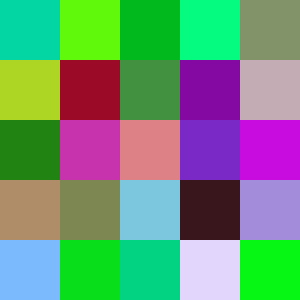

In [18]:
# Don't worry about the code here, what's important is looking at the image!
import cv2
from google.colab.patches import cv2_imshow
cv2_imshow(cv2.resize(img, (300, 300), interpolation = cv2.INTER_NEAREST))

Remember: The 3 channels, RGB, are represented by the last dimension

Finally, we're ready for a practical example of broadcasting using arrays!

In [19]:
# Lets make a mask to only get the blue colors
# Note that with cv2, they have blue first, green second, red third
mask = np.array([1, 0, 0])

# Broadcasting over the axis with dimension 3 (i.e., color dimension)
img_blue = img * mask 

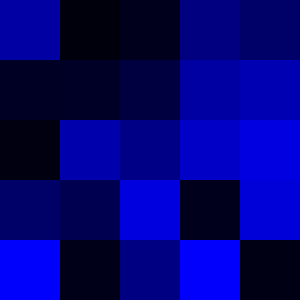

In [20]:
cv2_imshow(cv2.resize(img_blue, (300, 300), interpolation = cv2.INTER_NEAREST))

And look at that! We now only see the blue from the original image.

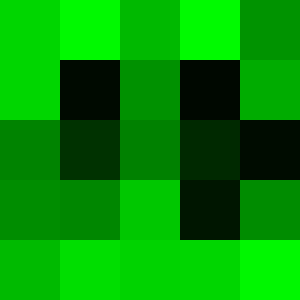

In [24]:
# TODO - Show only the green channel!
img_green = img * np.array([0, 1, 0])

cv2_imshow(cv2.resize(img_green, (300, 300), interpolation = cv2.INTER_NEAREST))

In [ ]:
#@title
# TODO - Show only the green channel!
img_green = img * np.array([0, 1, 0])

cv2_imshow(cv2.resize(img_green, (300, 300), interpolation = cv2.INTER_NEAREST))

## Slicing & Indexing

Indexing is when you specify certain indices of an array to create another array. Slicing is generally defined as getting just some subset of the array.

This could involve using indexing to get only a single element, or slicing to keep only certain dimensions/sections!

In [26]:
arr = np.array([[1, 2],
                [3, 4]])

Indexing to get a single element

In [27]:
# Get the element in the first row, second column
arr[0, 1]

2

Indexing, or slicing, based on axis

In [28]:
# Get the second column
print(arr[:, 1])

[2 4]


The `arr[:, 1]` means that you take all elements from the first dimension, but only those in the first index for the second dimension



In [29]:
# Get the first row
arr[0]

array([1, 2])

Note that `arr[0]` is equivalent to `arr[0, :]`. So, because you aren't specifying what to slice for the second dimension, it assumes you want all of the elements!

In [25]:
assert np.array_equal(a[1], a[1, :])

Finally, you don't just have to take certain elements or dimensions, but can only take certain chunks!

Let's go back to the image, and take just a chunk of pixels from it!

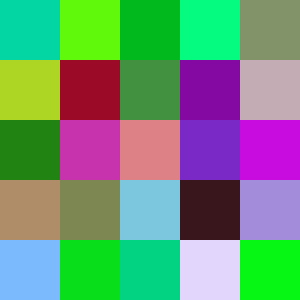

(5, 5, 3)

In [30]:
cv2_imshow(cv2.resize(img, (300, 300), interpolation = cv2.INTER_NEAREST))
img.shape

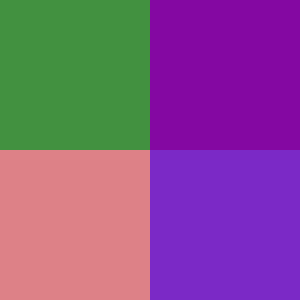

(5, 5, 3)

In [31]:
img_crop = img[1:3, 2:4, :]
cv2_imshow(cv2.resize(img_crop, (300, 300), interpolation = cv2.INTER_NEAREST))
img.shape

We just used NumPy indexing to crop the image!

## Axis

Most NumPy methods have an optional parameter called axis.

This means that you can treat certain dimensions (axes) as special when applying something like a mean, or a sum.

In [32]:
arr = np.array([
    [0, 2, 4, 6, 8, 10],
    [1, 3, 5, 7, 9, 11]
])

In [33]:
print(arr.sum())
print(arr.sum(axis=0))
print(arr.sum(axis=1))

66
[ 1  5  9 13 17 21]
[30 36]


## Linear Algebra

Most linear algebra operations on vectors and matrices can also be done with Numpy arrays

In [34]:
# Matrix 3x4
a = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])

# Matrix 4x2
b = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])

# Matrix multiplication 3x4 @ 4x2 = 3x2
c = np.matmul(a, b)
c 

array([[ 50,  60],
       [114, 140],
       [178, 220]])

In [35]:
import numpy as np
# Matrix 3x4
w = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])

# Vector 4x1
x = np.array([1, 2, 3, 4])

# Vector 3x1
b = np.array([4, 5, 6])

# @ can also be used to multiply matrices
z = w @ x + b # 3x4 @ 4x1 + 3x1 
z

array([ 34,  75, 116])

## Vectorization

Numpy operations are extremly efficient, allowing to obtain optimal speeds even when Python is an interpreted language.

With such efficient speeds, it is posible to optimize the overall code running time if you can identify when it is possible to apply vectorization and broadcasting.

Put simply, vectorization consists of replacing iterations with a vector, array operation, or broadcasting.


In general, always try to consider if a for loop can be vectorized instead.  This will become  important later when working with deep learning models ;)

Let's see how much time we can save by vectorizing some operations:

In [36]:
# A function with a for loop
def slow_operation(n=1000):
    arr = np.arange(n)
    diff = np.zeros(n-1)
    
    for i in range(1, n):
        diff[i-1] = np.sqrt(arr[i]**2 - arr[i-1]**2)
    
    return sum(diff)/n
    
slow_operation()

29.769614699783833

Let's time it

In [43]:
%timeit slow_operation()

100 loops, best of 5: 2.94 ms per loop


In [41]:
# The same operation vectorized
def fast_operation(n=1000):
    arr = np.arange(n)
    diff = np.sqrt(arr[1:]**2 - arr[:-1]**2)
    
    return sum(diff)/n
    
fast_operation()

29.769614699783833

Let's time it

In [44]:
%timeit fast_operation()

1000 loops, best of 5: 175 µs per loop


Its not even close! 

Even if this diference seems small, when working with large datasets this small optimizations can save you from hours to days of running time.

## Data Normalization

While working with data in the real-world, we may need to deal with some very large numbers. For example, house prices worth hundreds of thousands of dollars. For many numerical reasons, machine learning models such as neural networks don't do well with this large data.

How can we fix this? Normalization, or normalizing the data! Normalization will change the feature (data) values, however the relationship between values will still exist, which is all we need!

Some popular data normalization techniques:

Min-max Normalization: Linearly squash the values between 0 and 1.


Standardization:

The idea behind standardization is that the mean (average) and standard deviation (amount of variation/dispersion across the values) is what's affecting our results. Then, we 'standardize' the features to have a given mean and variance.

In Python there are several libraries and tools that can help in data normalization, but in this lab lets see how to do it with Numpy.

In [45]:
 A = np.array([[1,1,1],[4,5,6],[7,8,9]])

 def standardize(features):
     mean = np.mean(features, axis=0)
     print("Feature wise mean: ", mean)
     deviation = np.std(features, axis=0)
     print("Feature wise deviation: ", deviation)
     # to avoid division by 0
     std_feat = (features - mean)/(deviation + 1e-8)
     return std_feat

standardize(A)

Feature wise mean:  [4.         4.66666667 5.33333333]
Feature wise deviation:  [2.44948974 2.86744176 3.29983165]


array([[-1.22474487, -1.27872402, -1.3131983 ],
       [ 0.        ,  0.11624764,  0.20203051],
       [ 1.22474487,  1.16247638,  1.1111678 ]])

In [47]:
# TODO - Fill out this min-max normalization function
def min_max_normalization(features):
  min = np.min(features,axis=0)
  max = np.max(features, axis=1)
  features = features - min
  features = features/(min-max)
  return features

In [46]:
#@title
def min_max_normalization(features):
  min = np.min(features, axis=0)
  max = np.max(features, axis=1)
  
  # Bring lower range down to 0
  features = features - min
  
  # Bring upper range down to 1 by dividing by
  # the new maximum (original maximum - min)
  features = features/(max - min)
  return features

## Linear Regression 

Linear regression is one of the first and most basic supervised learning algorithms. 

Still, a quick linear regresion can give a starting point before trying more complex models, and in some cases it might work just as well.

Like in normalization, Python has several libraries that can do linear regression, but let's try to build an implementetion using NumPy.

Note: This is just to illustrate the power of NumPy, we do not expect you to know and understand linear regression at this time.

The coefficients are b0 -0.30 and b1 1.95 


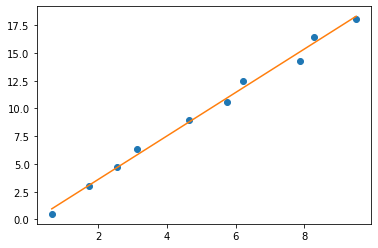

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some data in an array
#sample = np.array([[1,3],[2,4],[3,5.5],[4,8.2],[5,10],[6,11],[7,13], [8,14.2], [9,19], [10,20.3]])
# Some random data
sample = np.array([[x + np.random.random(), x*2 + np.random.random()] for x in range(10)]) 

# Get the x and y values 
x = sample[:,0]
y = sample[:,1]

# Find the number of samples in the data
n = x.size

# Calculate the mean values for x and y
xm, ym = np.mean(x), np.mean(y)

# Calculate the coefficients - this is math you don't need to know, don't worry
b1 = (np.sum(y*x) - n*ym*xm) / (np.sum((x - xm)**2))
b0 = ym - b1*xm

# print the results
print("The coefficients are b0 %2.2f and b1 %2.2f " % (b0,b1))

# Plot the original data
plt.plot(x, y, 'o') 
# Plot the linear regression
plt.plot(x, x*b1 + b0)
plt.show()

This is a look at our first machine learning model!

It's easy to dismiss this simple algorithms when you are used to working with more complex and exiting models, but they still have their uses to this day,  so try to consider them when working in a real life problem.

## More Information

This is the end of the lab, Numpy is a huge library with several functionalities and we cant cover them all in this material. 

Also, some of you might already be familiar with Numpy and general data manipulation, so if you are curious to learn more we recommend that you check the following links:

https://numpy.org/doc/stable/index.html

https://numpy.org/doc/stable/user/basics.broadcasting.html